# Imports and Preliminaries

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np

from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error as MSE
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

from datetime import datetime as dt
from IPython.display import clear_output

import seaborn as sns
from scipy import stats
from scipy.stats import norm

In [ ]:
def modelTest(X, y, model, k, d = 2, rs = 123):
  '''
  X: input
  y: output
  model: Lasso, Ridge, ElasticNet, etc.
  k: amount of folds for KFold
  d: degree of polynomial
  rs: random_state set to 123 by default
  '''
  kf = KFold(n_splits = k, shuffle = True, random_state = rs)
  # We want the function to output both the internal and external validation
  R2train = []
  R2test = []

  # Keep track of MSE (is a good metric interchangable with R2)
    # R2 = 1-n*MSE/sum(y-mean(y))^2
  MSEtrain = []
  MSEtest = []

  # Create a pipeline for preprocessing, such as ascaling and polynomial features
  scale = StandardScaler()
  poly = PolynomialFeatures(degree = d)

  pipe = Pipeline([['Scaling', scale],['Polynomial Featuers', poly]])

  for idxtrain, idxtest in kf.split(X):
    xtrain = X[idxtrain]
    xtest = X[idxtest]
    ytrain = y[idxtrain]
    ytest = y[idxtest]

    # Apply the pipeline to the input features

    xpoly_train = pipe.fit_transform(xtrain)
    xpoly_test = pipe.transform(xtest)

    model.fit(xpoly_train, ytrain)
    R2train.append(model.score(xpoly_train, ytrain))
    R2test.append(model.score(xpoly_test, ytest))
    MSEtrain.append(MSE(ytrain, model.predict(xpoly_train)))
    MSEtest.append(MSE(ytest, model.predict(xpoly_test)))

  return np.mean(R2train), np.mean(R2test), np.mean(MSEtrain), np.mean(MSEtest)

In [ ]:
df = pd.read_csv('drive/MyDrive/qsar_fish_toxicity.csv',sep = ';', names = ['CIC0', 'SM1_Dz(Z)','GATS1i','NdsCH','NdssC','MLOGP','quantitative response, LC50 [-LOG(mol/L)]'])

X = df.loc[:, 'CIC0':'MLOGP'].values
y = df.loc[:, 'quantitative response, LC50 [-LOG(mol/L)]'].values

# **Ridge Regression**


## Degree 1

In [ ]:
aRangeRidge = np.arange(0.5,500, 0.5)

R2trainR1 = []
R2testR1 = []

tStart = dt.now()
for a in aRangeRidge:
    clear_output()
    print('Running a =', a)
    modelR = Ridge(alpha = a, max_iter=10000, fit_intercept=False)
    R2internal_temp, R2external_temp, _, _ = modelTest(X, y, modelR, 10, 1)
    print(dt.now()-tStart)
    R2trainR1.append(R2internal_temp)
    R2testR1.append(R2external_temp)
idxMax = np.argmax(R2testR1)
[R2trainR1[idxMax], R2testR1[idxMax], aRangeRidge[idxMax]]

Running a = 499.5
0:00:50.442147


[0.5774687597003157, 0.5609908395982995, 3.0]

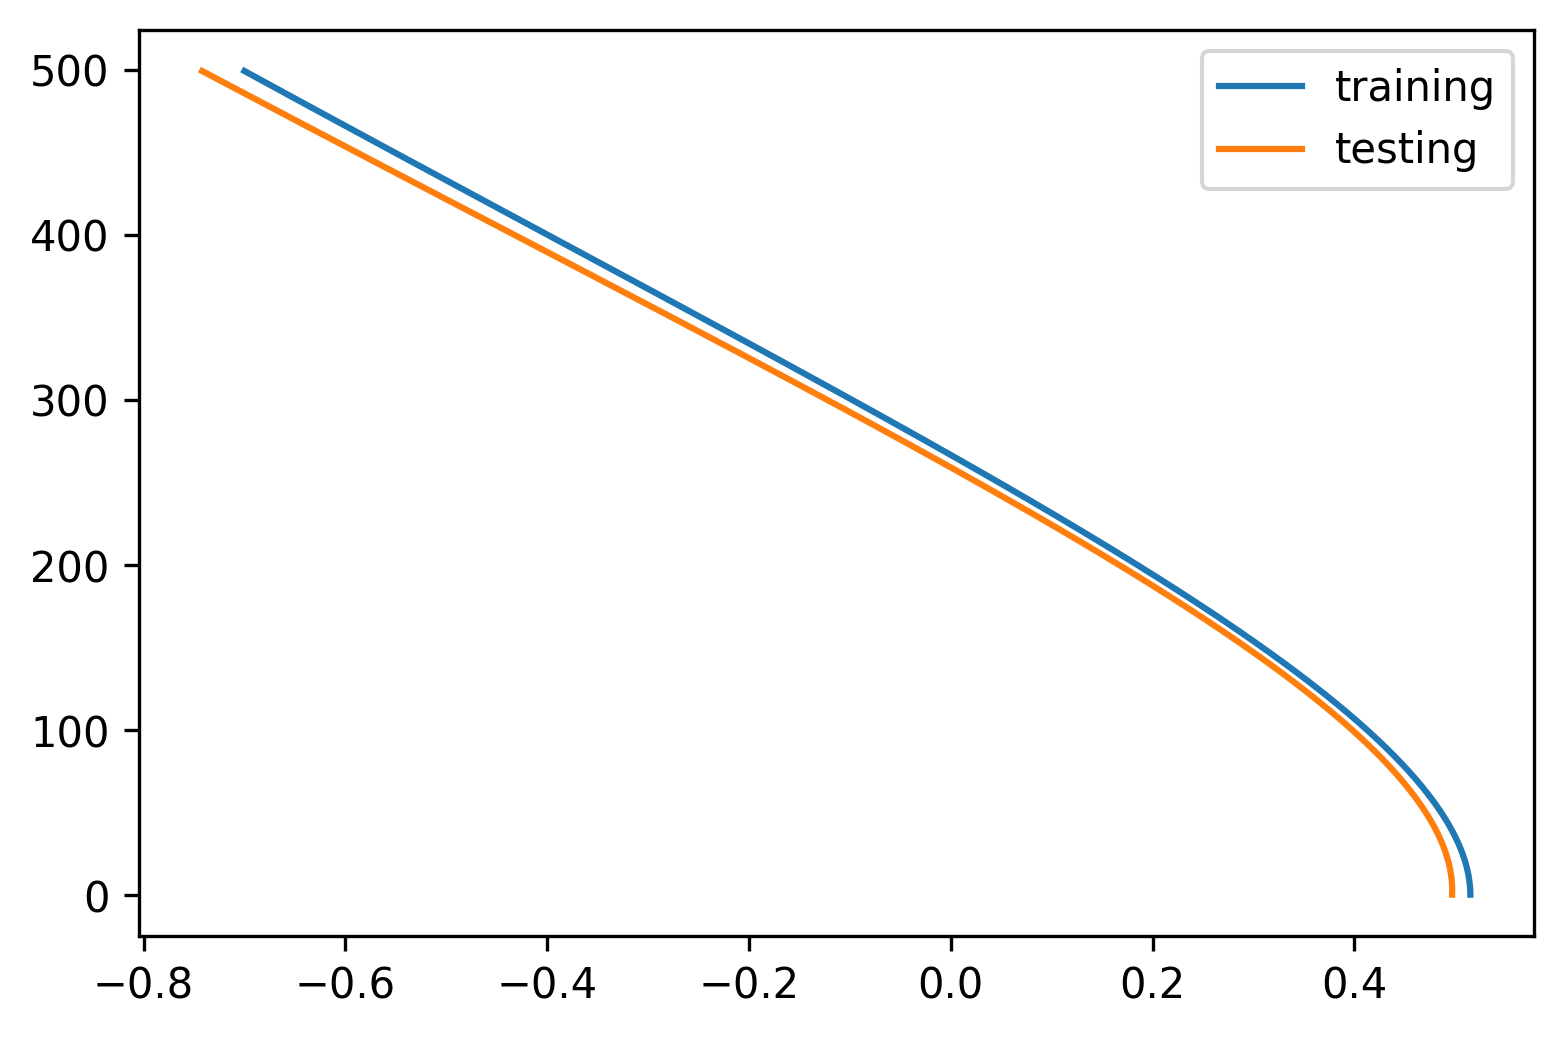

In [ ]:
plt.plot(R2trainR1,aRangeRidge, label = 'training')
plt.plot(R2testR1,aRangeRidge, label = 'testing')
plt.legend()
plt.show()

## Degree 2

In [ ]:
aRangeRidge = np.arange(0.5,500, 0.5)

R2trainR2 = []
R2testR2 = []

tStart = dt.now()
for a in aRangeRidge:
    clear_output()
    print('Running a =', a)
    modelR = Ridge(alpha = a, max_iter=10000, fit_intercept=False)
    R2internal_temp, R2external_temp, _, _ = modelTest(X, y, modelR, 10, 2)
    print(dt.now()-tStart)
    R2trainR2.append(R2internal_temp)
    R2testR2.append(R2external_temp)
idxMax = np.argmax(R2testR2)
[R2trainR2[idxMax], R2testR2[idxMax], aRangeRidge[idxMax]]

Running a = 499.5
0:01:11.644607


[0.6264710871082877, 0.5666968547810682, 0.5]

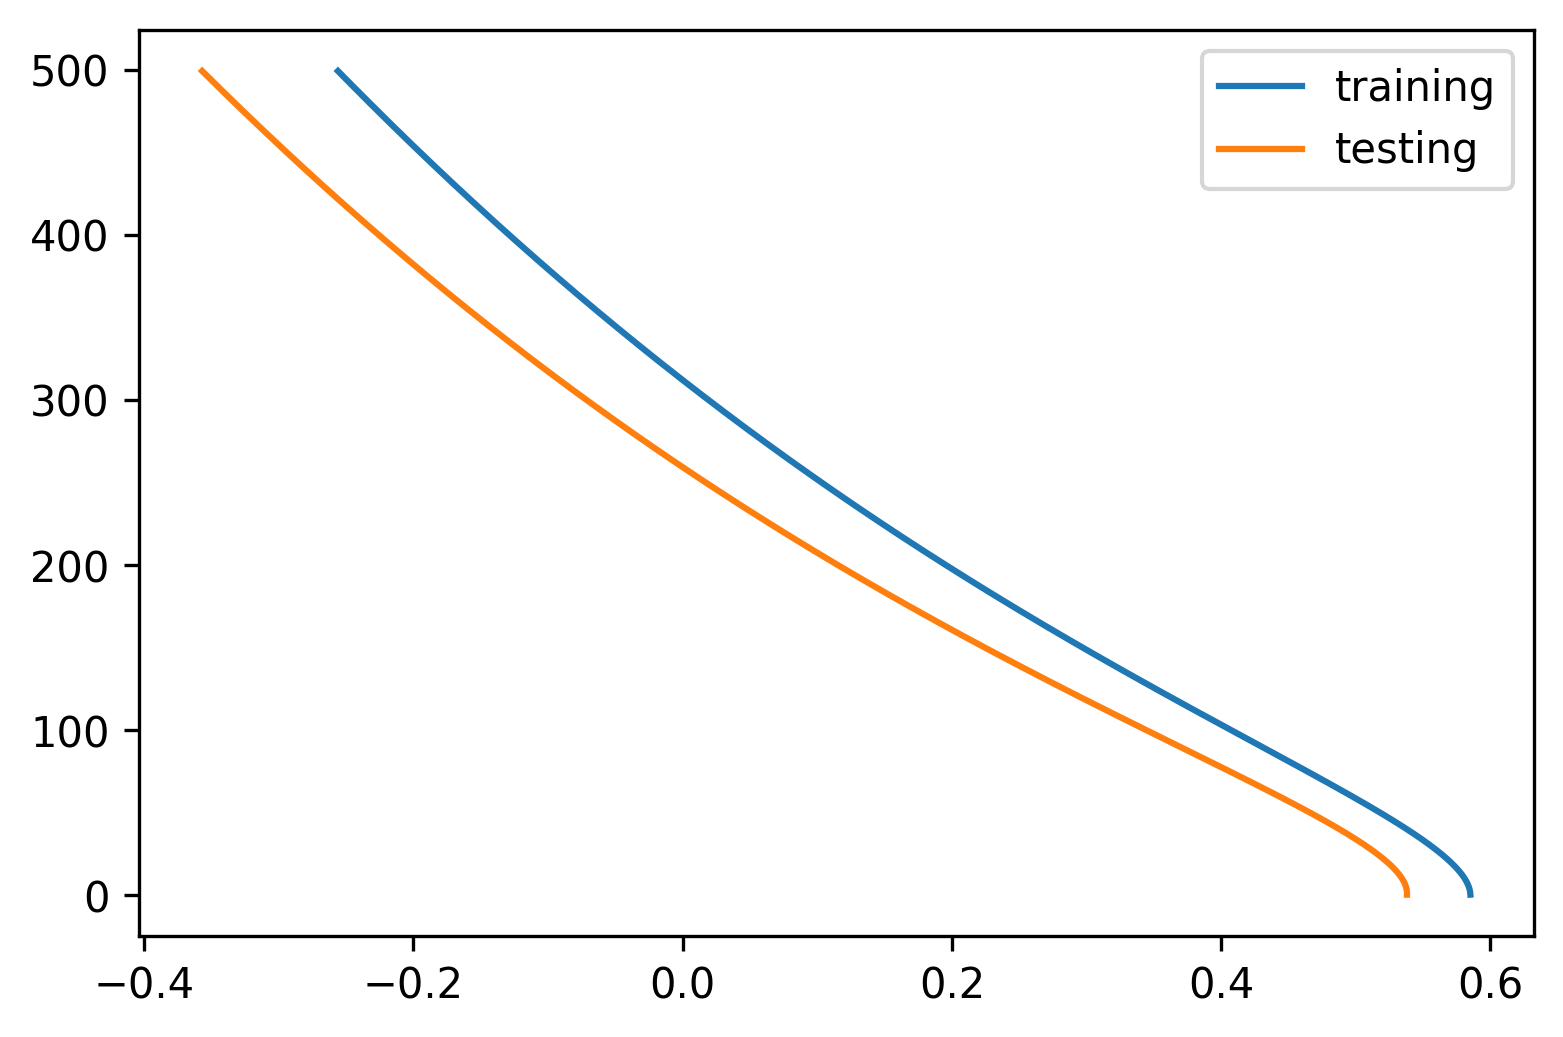

In [ ]:
plt.plot(R2trainR2,aRangeRidge, label = 'training')
plt.plot(R2testR2,aRangeRidge, label = 'testing')
plt.legend()
plt.show()

## Degree 3

In [ ]:
aRangeRidge = np.arange(0.5,500, 0.5)

R2trainR3 = []
R2testR3 = []

tStart = dt.now()
for a in aRangeRidge:
    clear_output()
    print('Running a =', a)
    modelR = Ridge(alpha = a, max_iter=10000, fit_intercept=False)
    R2internal_temp, R2external_temp, _, _ = modelTest(X, y, modelR, 10, 3)
    print(dt.now()-tStart)
    R2trainR3.append(R2internal_temp)
    R2testR3.append(R2external_temp)
idxMax = np.argmax(R2testR3)
[R2trainR3[idxMax], R2testR3[idxMax], aRangeRidge[idxMax]]

Running a = 499.5
0:01:33.648373


[0.7049694938844225, 0.43178862509794486, 9.5]

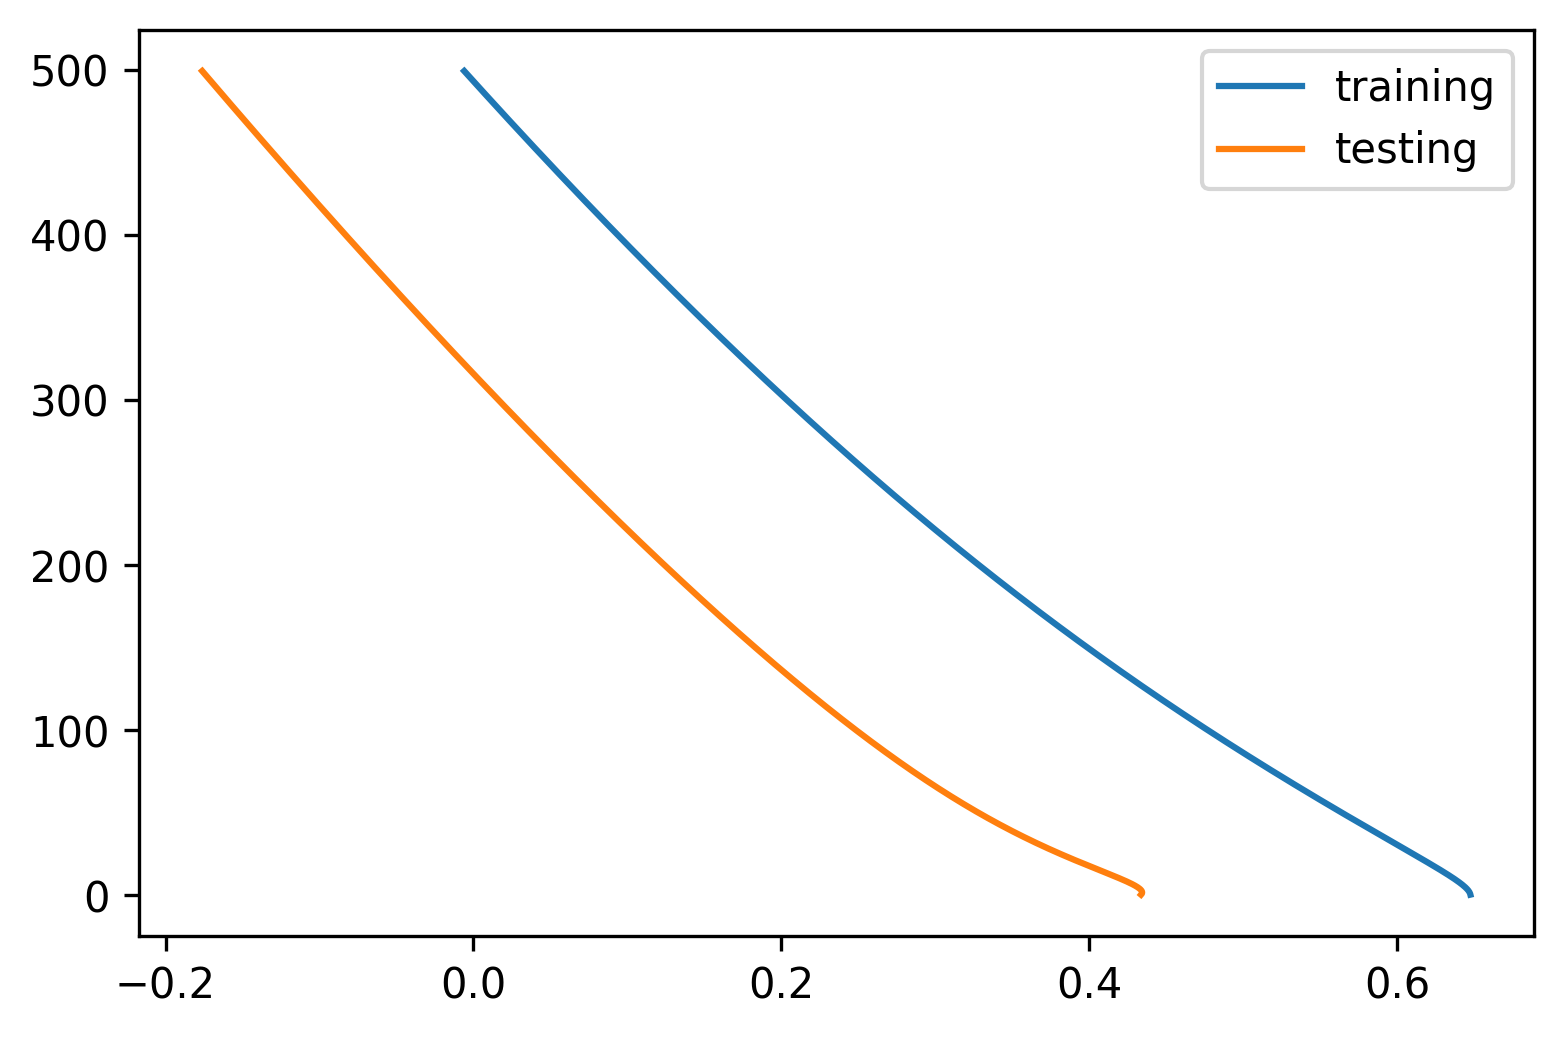

In [ ]:
plt.plot(R2trainR3,aRangeRidge, label = 'training')
plt.plot(R2testR3,aRangeRidge, label = 'testing')
plt.legend()
plt.show()

# **Lasso Regression**


## Degree 1

In [ ]:
aRangeLasso = np.arange(0.01,2, 0.01)

R2trainL1 = []
R2testL1 = []

tStart = dt.now()
for a in aRangeLasso:
    clear_output()
    print('Running a =', a)
    modelL = Lasso(alpha = a, max_iter=10000, fit_intercept=False)
    R2internal_temp, R2external_temp, _, _ = modelTest(X, y, modelL, 10, 1)
    print(dt.now()-tStart)
    R2trainL1.append(R2internal_temp)
    R2testL1.append(R2external_temp)
idxMax = np.argmax(R2testL1)
[R2trainL1[idxMax], R2testL1[idxMax], aRangeLasso[idxMax]]

Running a = 1.99
0:00:10.087117


[0.5772965007255885, 0.560868987869644, 0.01]

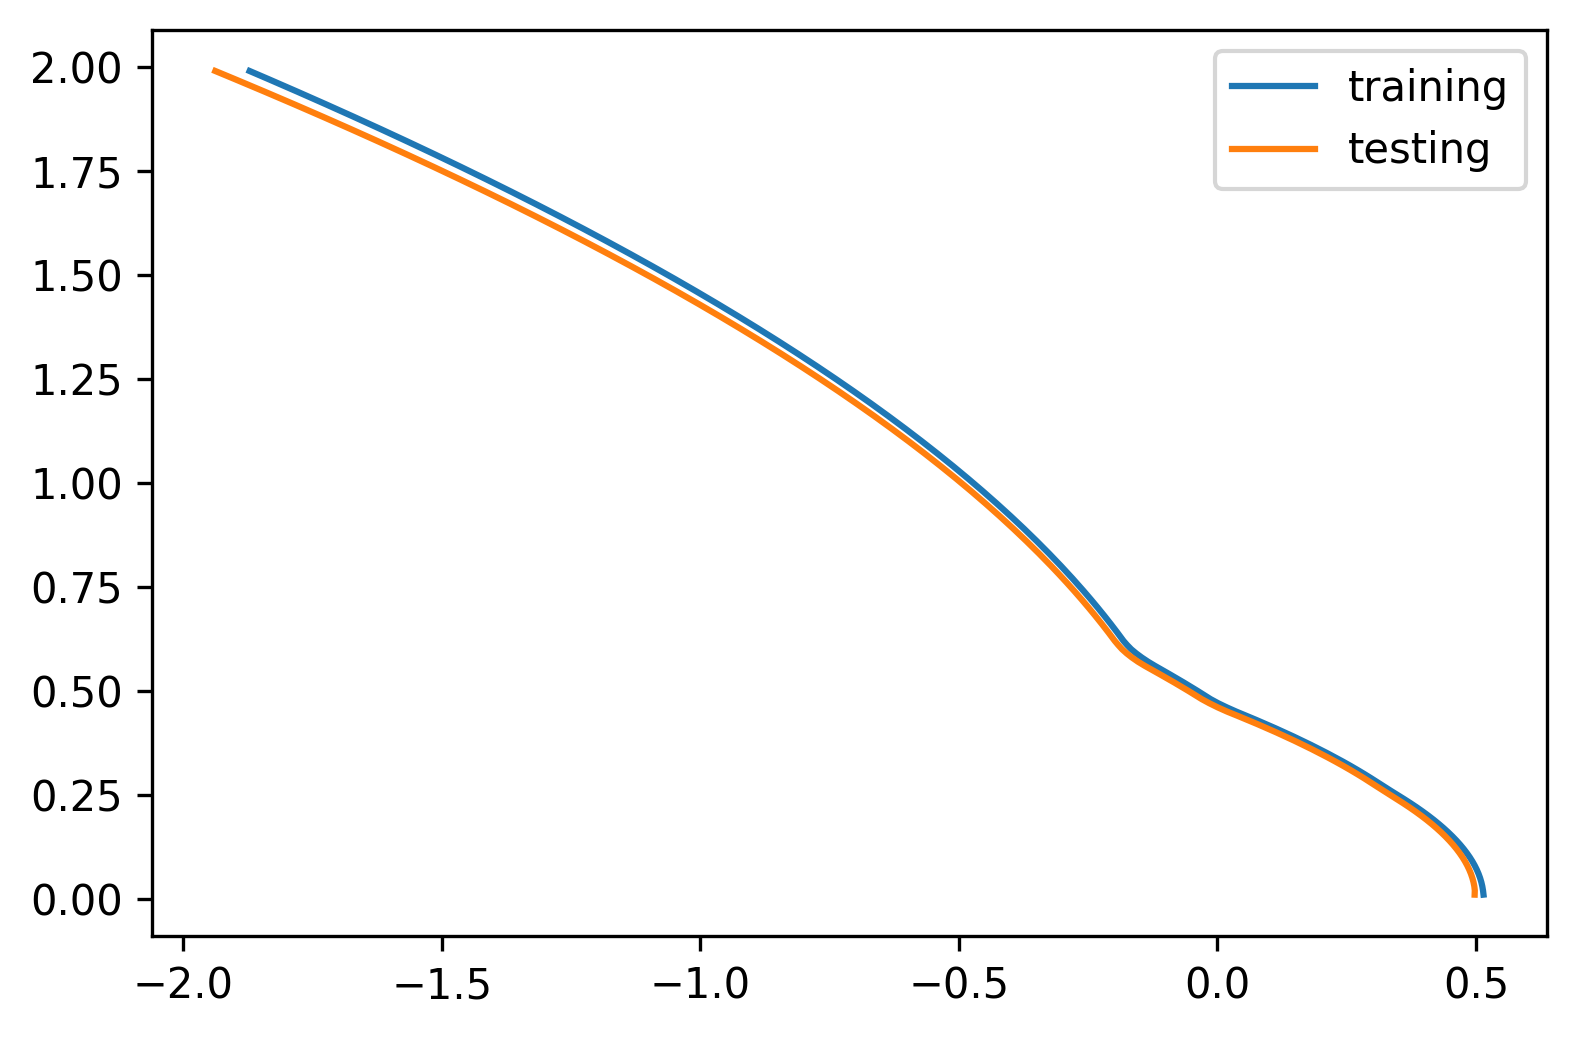

In [ ]:
plt.plot(R2trainL1,aRangeLasso, label = 'training')
plt.plot(R2testL1,aRangeLasso, label = 'testing')
plt.legend()
plt.show()

## Degree 2

In [ ]:
aRangeLasso = np.arange(0.01,2, 0.01)

R2trainL2 = []
R2testL2 = []

tStart = dt.now()
for a in aRangeLasso:
    clear_output()
    print('Running a =', a)
    modelL = Lasso(alpha = a, max_iter=10000, fit_intercept=False)
    R2internal_temp, R2external_temp, _, _ = modelTest(X, y, modelL, 10, 2)
    print(dt.now()-tStart)
    R2trainL2.append(R2internal_temp)
    R2testL2.append(R2external_temp)
idxMax = np.argmax(R2testL2)
[R2trainL2[idxMax], R2testL2[idxMax], aRangeLasso[idxMax]]

Running a = 1.99
0:00:14.071388


[0.5830228024329889, 0.5390843329067764, 0.01]

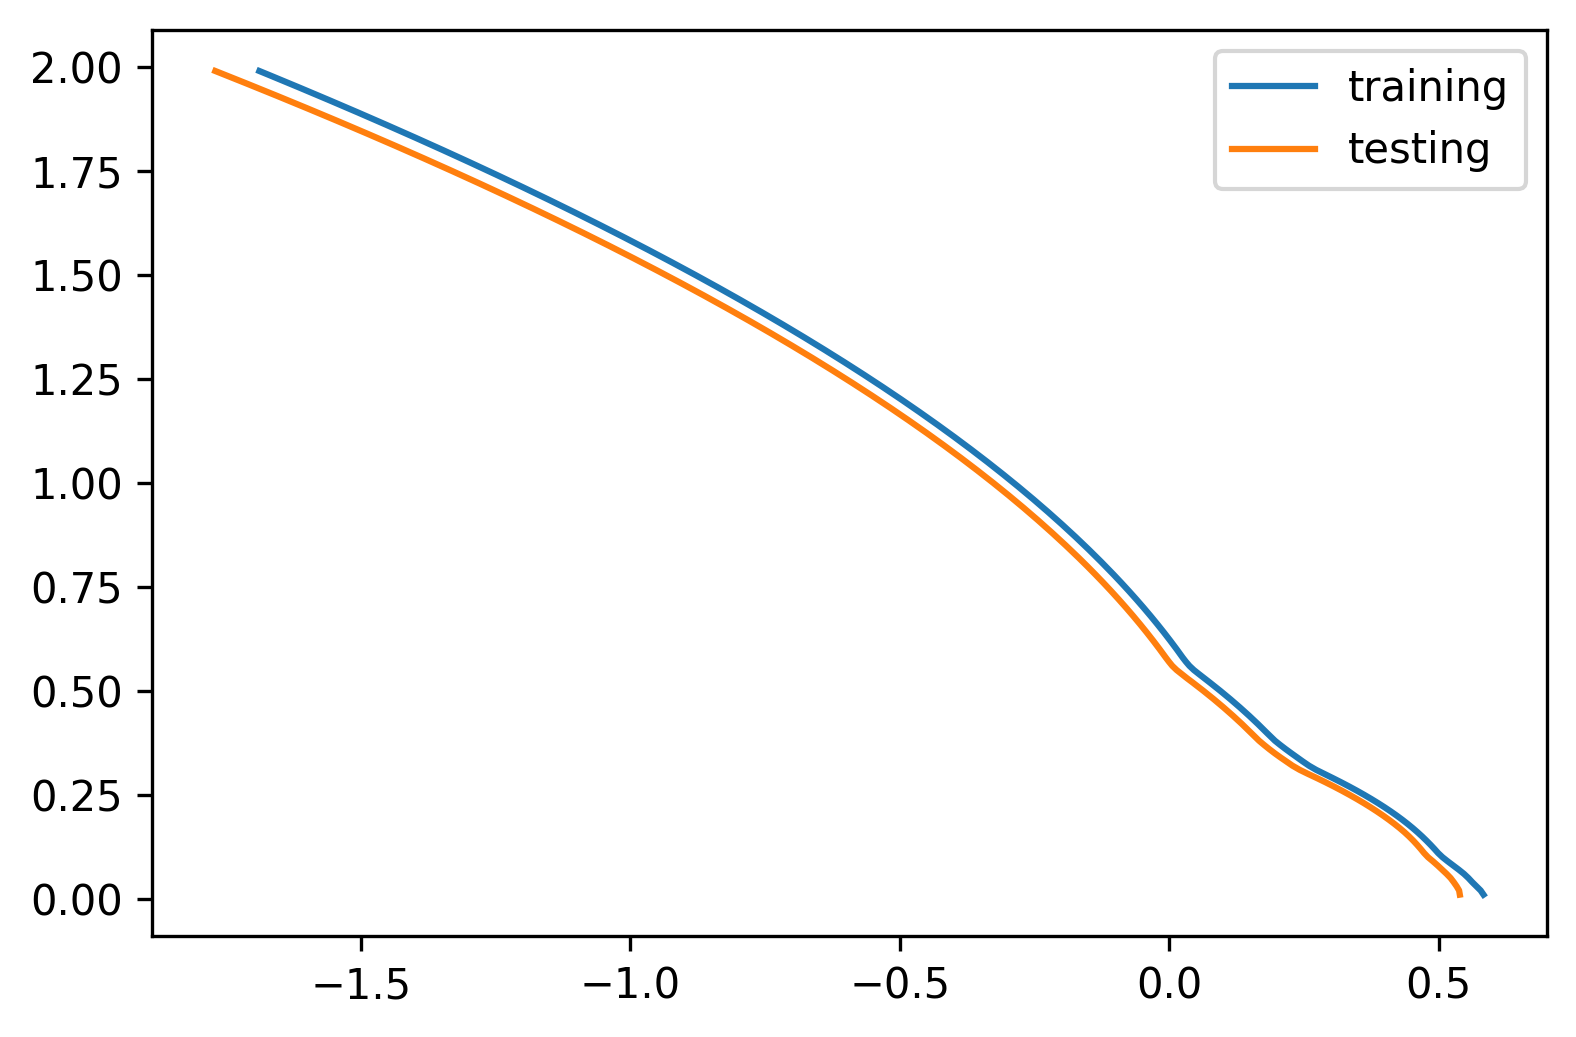

In [ ]:
plt.plot(R2trainL2,aRangeLasso, label = 'training')
plt.plot(R2testL2,aRangeLasso, label = 'testing')
plt.legend()
plt.show()

## Degree 3

In [ ]:
aRangeLasso = np.arange(0.01,2, 0.01)

R2trainL3 = []
R2testL3 = []

tStart = dt.now()
for a in aRangeLasso:
    clear_output()
    print('Running a =', a)
    modelL = Lasso(alpha = a, max_iter=10000, fit_intercept=False)
    R2internal_temp, R2external_temp, _, _ = modelTest(X, y, modelL, 10, 3)
    print(dt.now()-tStart)
    R2trainL3.append(R2internal_temp)
    R2testL3.append(R2external_temp)
idxMax = np.argmax(R2testL3)
[R2trainL3[idxMax], R2testL3[idxMax], aRangeLasso[idxMax]]

Running a = 1.99
0:00:19.843282


[0.6834927425573506, 0.563246203784396, 0.02]

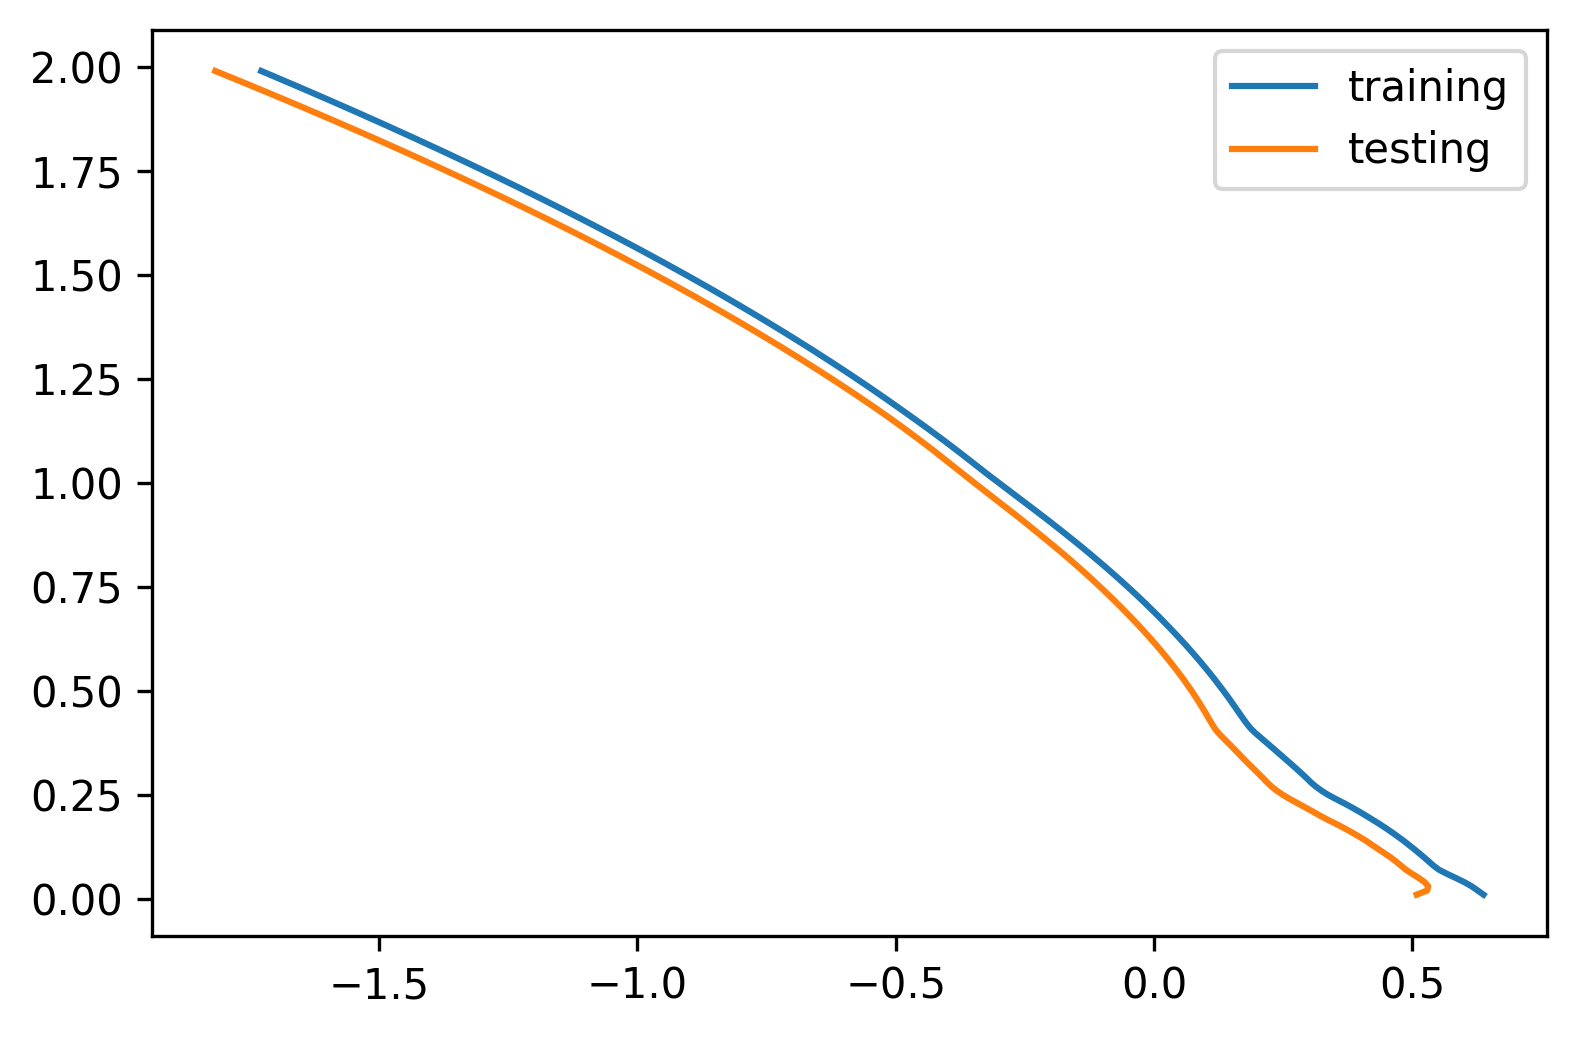

In [ ]:
plt.plot(R2trainL3,aRangeLasso, label = 'training')
plt.plot(R2testL3,aRangeLasso, label = 'testing')
plt.legend()
plt.show()

# **Elastic Net**


## Degree 1

In [ ]:
aRangeElasticNet = np.arange(0.01,2, 0.01)

R2trainE1 = []
R2testE1 = []

tStart = dt.now()
for a in aRangeElasticNet:
    clear_output()
    print('Running a =', a)
    modelEN = ElasticNet(alpha = a, max_iter=10000, fit_intercept=False)
    R2internal_temp, R2external_temp, _, _ = modelTest(X, y, modelEN, 10, 1)
    print(dt.now()-tStart)
    R2trainE1.append(R2internal_temp)
    R2testE1.append(R2external_temp)
idxMax = np.argmax(R2testE1)
[R2trainE1[idxMax], R2testE1[idxMax], aRangeElasticNet[idxMax]]

Running a = 1.99
0:00:10.216488


[0.5771785098086142, 0.560923248719645, 0.01]

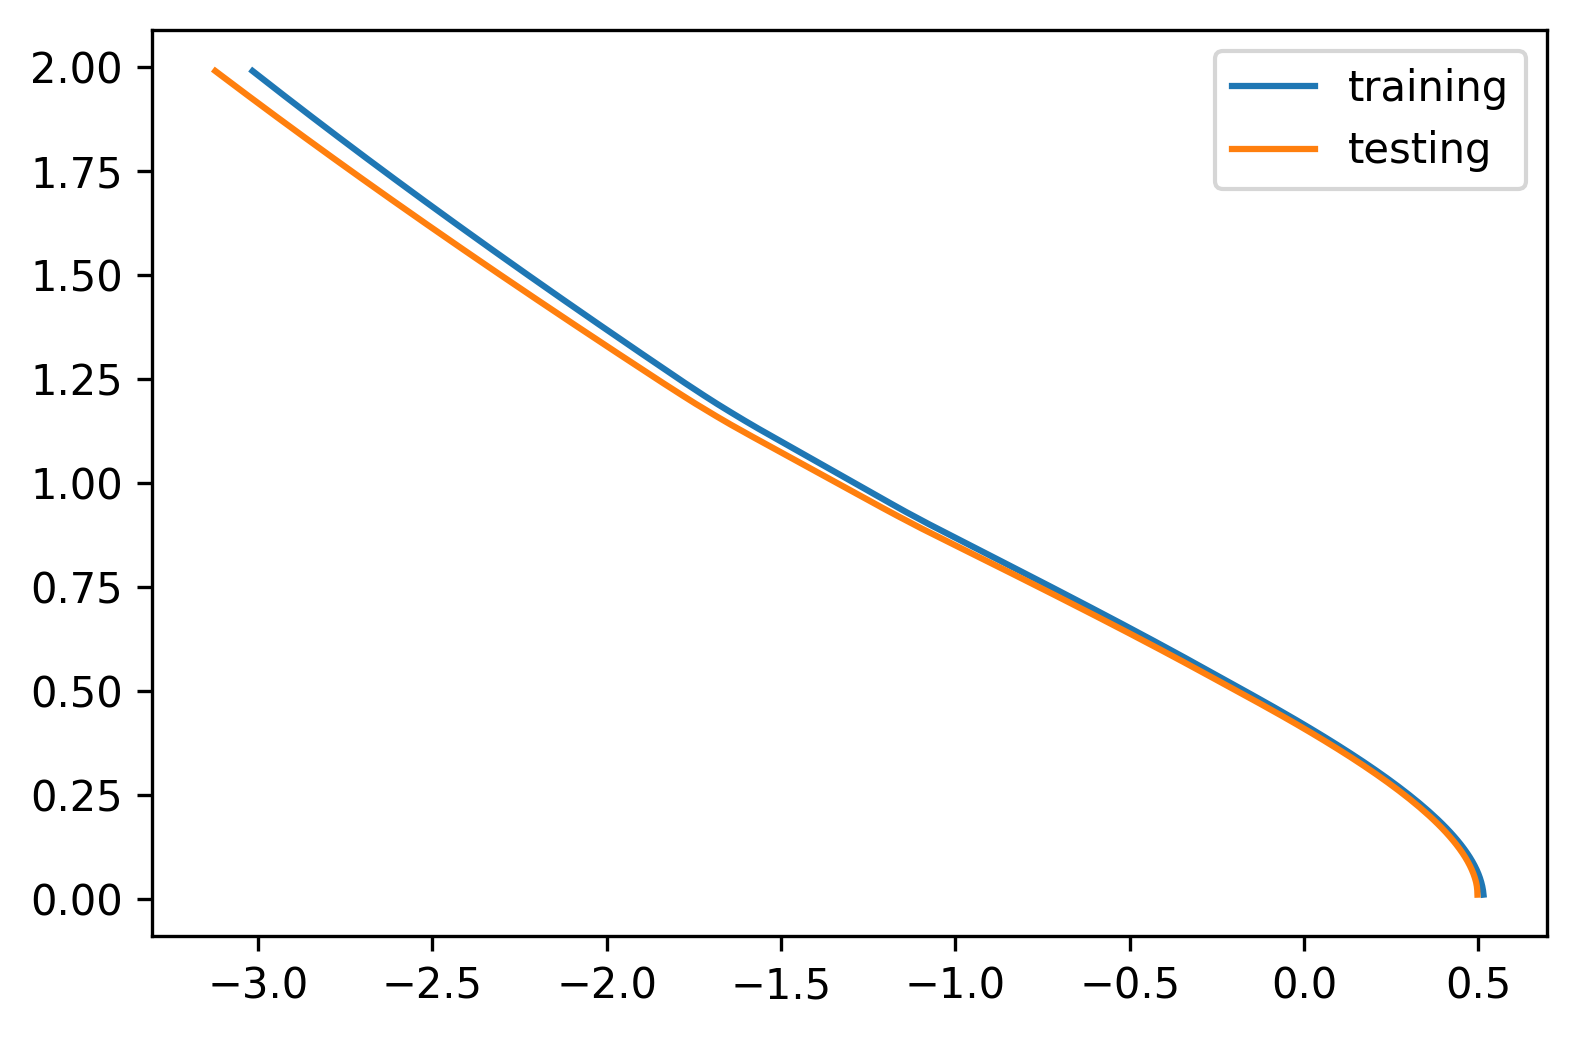

In [ ]:
plt.plot(R2trainE1,aRangeLasso, label = 'training')
plt.plot(R2testE1,aRangeLasso, label = 'testing')
plt.legend()
plt.show()

## Degree 2

In [ ]:
aRangeElasticNet = np.arange(0.01,2, 0.01)

R2trainE2 = []
R2testE2 = []

tStart = dt.now()
for a in aRangeElasticNet:
    clear_output()
    print('Running a =', a)
    modelEN = ElasticNet(alpha = a, max_iter=10000, fit_intercept=False)
    R2internal_temp, R2external_temp, _, _ = modelTest(X, y, modelEN, 10, 2)
    print(dt.now()-tStart)
    R2trainE2.append(R2internal_temp)
    R2testE2.append(R2external_temp)
idxMax = np.argmax(R2testE2)
[R2trainE2[idxMax], R2testE2[idxMax], aRangeElasticNet[idxMax]]

Running a = 1.99
0:00:15.051590


[0.6241609382216913, 0.5721267667369427, 0.01]

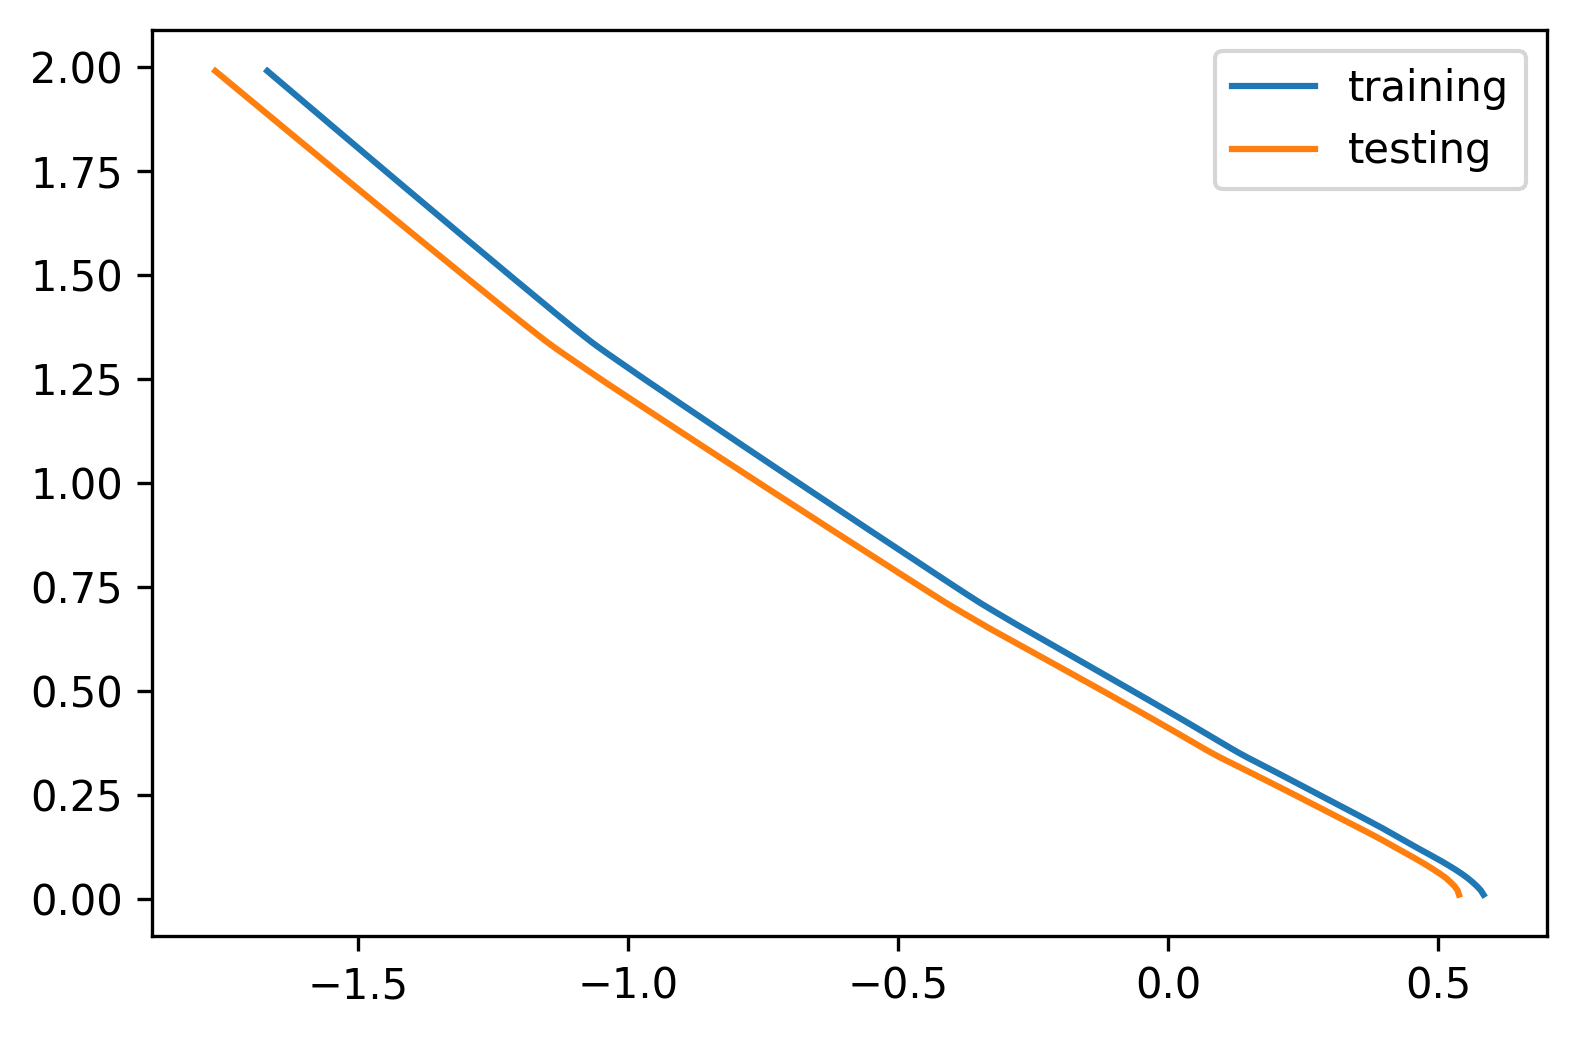

In [ ]:
plt.plot(R2trainE2,aRangeLasso, label = 'training')
plt.plot(R2testE2,aRangeLasso, label = 'testing')
plt.legend()
plt.show()

## Degree 3

In [ ]:
aRangeElasticNet = np.arange(0.01,2, 0.01)

R2trainE3 = []
R2testE3 = []

tStart = dt.now()
for a in aRangeElasticNet:
    clear_output()
    print('Running a =', a)
    modelEN = ElasticNet(alpha = a, max_iter=10000, fit_intercept=False)
    R2internal_temp, R2external_temp, _, _ = modelTest(X, y, modelEN, 10, 3)
    print(dt.now()-tStart)
    R2trainE3.append(R2internal_temp)
    R2testE3.append(R2external_temp)
idxMax = np.argmax(R2testE3)
[R2trainE3[idxMax], R2testE3[idxMax], aRangeElasticNet[idxMax]]

Running a = 1.99
0:00:22.657358


[0.680548079519136, 0.535390480098538, 0.03]

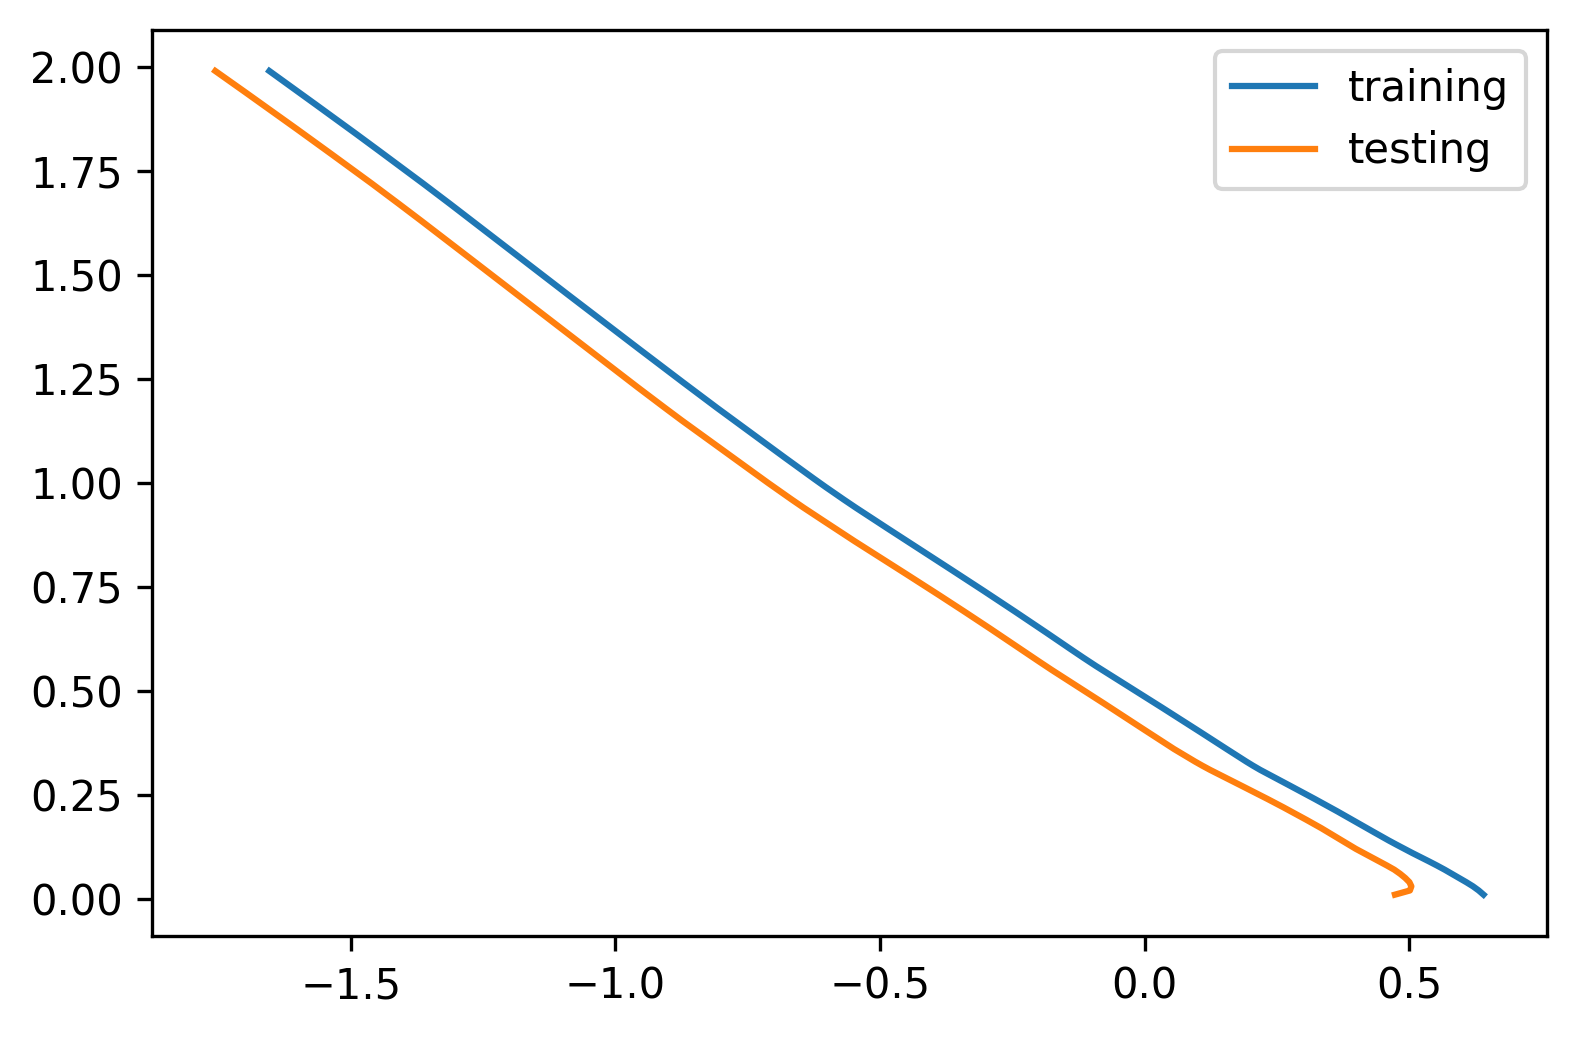

In [ ]:
plt.plot(R2trainE3,aRangeLasso, label = 'training')
plt.plot(R2testE3,aRangeLasso, label = 'testing')
plt.legend()
plt.show()

# **Computing Residuals on best model (Lasso Degree 2)**

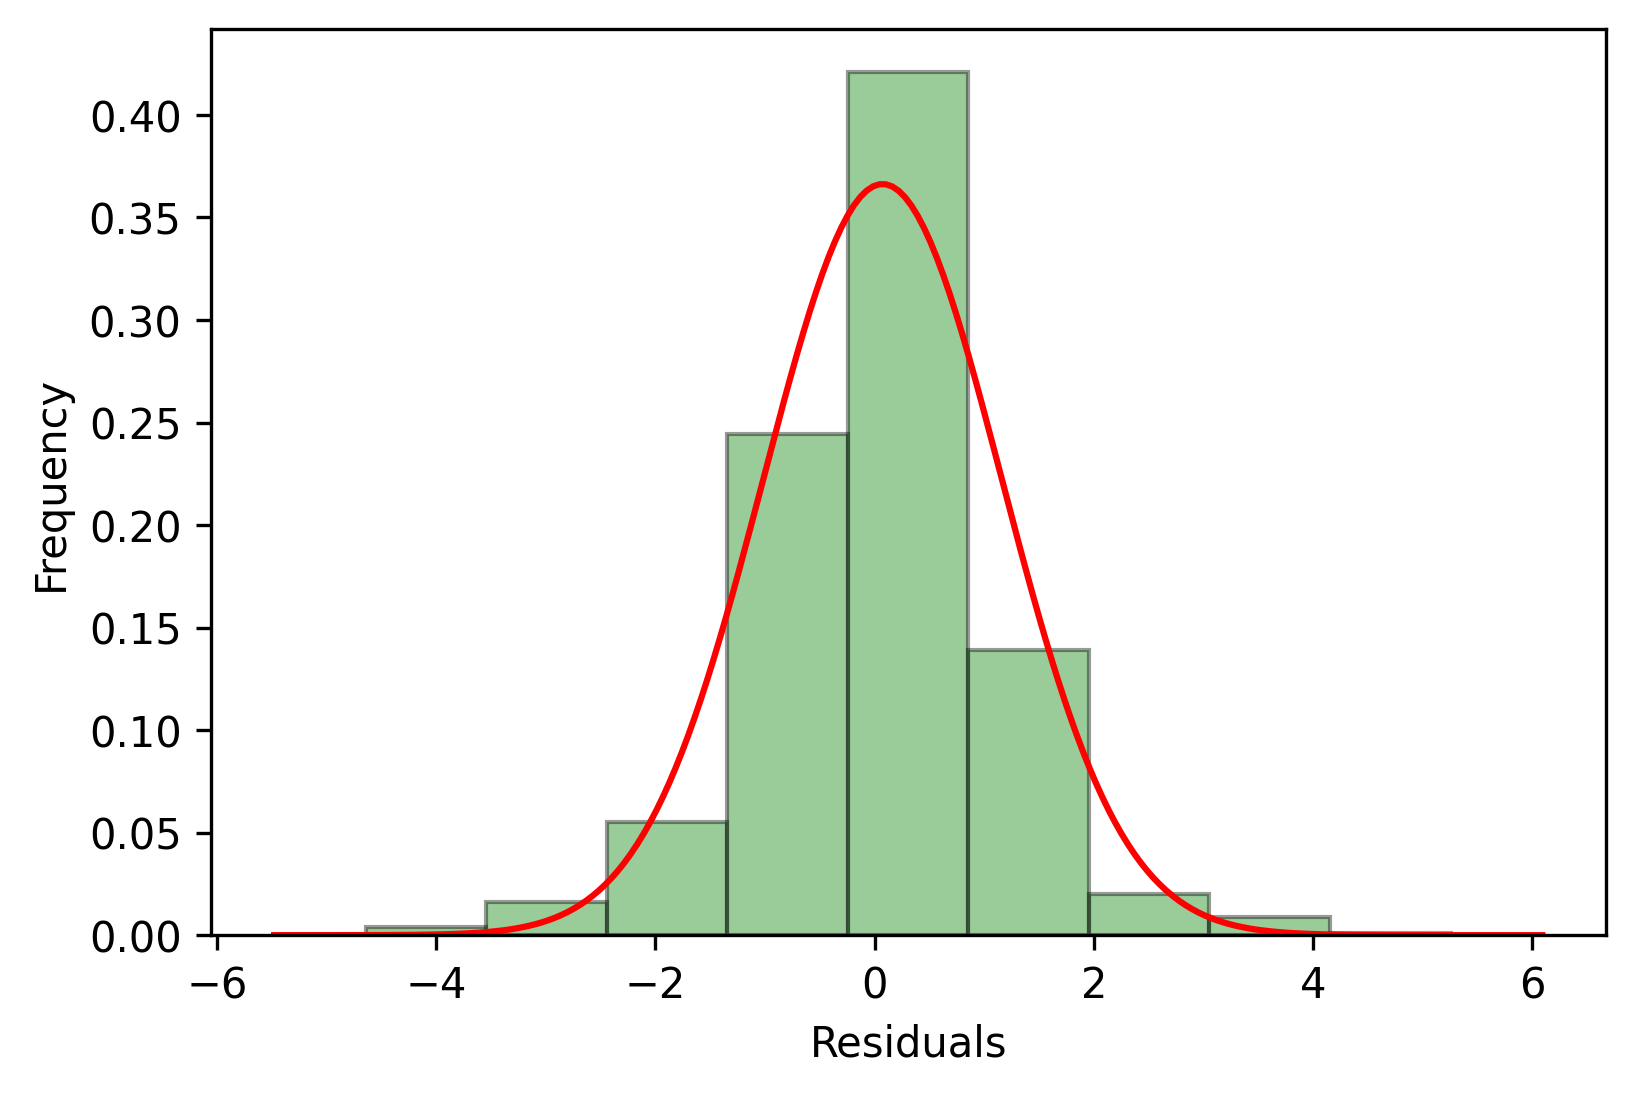

In [ ]:
modelLa = Lasso(alpha = 0.01, fit_intercept=False)
modelLa.fit(X,y)

residuals = y - modelLa.predict(X)

ax1 = sns.distplot(residuals,
                  bins=9,
                  kde=False,
                  color='deepskyblue',
                  hist_kws={"color":'green','ec':'black'},
                  fit=stats.norm,
                  fit_kws={"color":'red'})
ax1.set(xlabel='Residuals', ylabel='Frequency')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


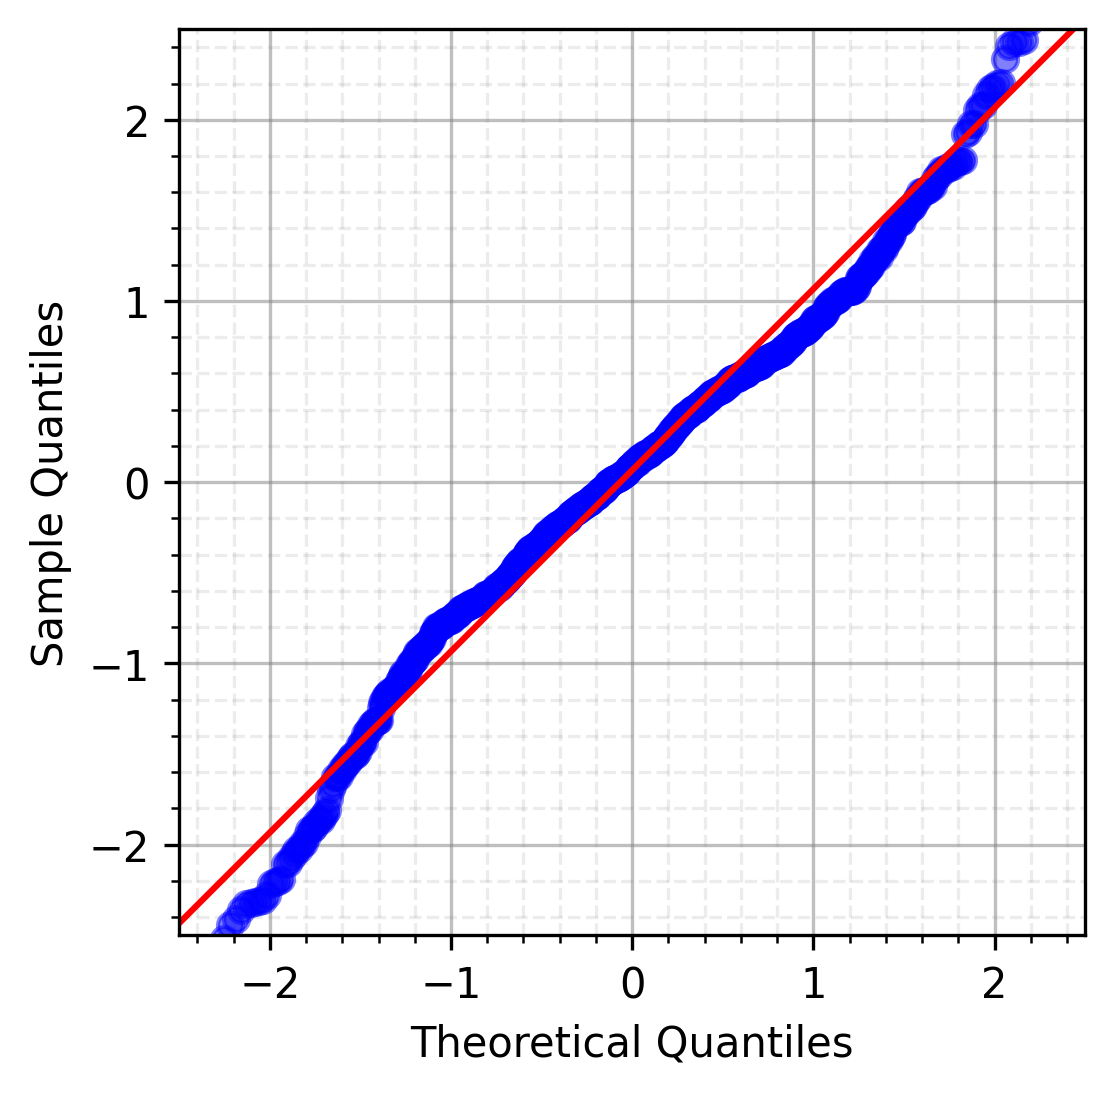

In [ ]:
import statsmodels.api as sm
sm.qqplot(residuals/np.std(residuals), loc = 0, scale = 1, line='s',alpha=0.5)
plt.xlim([-2.5,2.5])
plt.ylim([-2.5,2.5])
plt.axes().set_aspect('equal')
plt.grid(b=True,which='major', color ='grey', linestyle='-', alpha=0.5)
plt.grid(b=True,which='minor', color ='grey', linestyle='--', alpha=0.15)
plt.minorticks_on()
plt.show()

In [ ]:
stats.kstest(residuals, stats.norm.cdf)

KstestResult(statistic=0.060333040545674455, pvalue=0.0025767398605640195)

In [ ]:
stats.anderson(residuals,'norm')

AndersonResult(statistic=5.363686926099945, critical_values=array([0.573, 0.653, 0.784, 0.914, 1.087]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [ ]:
# A pvalue of < 0.05 is considered statistically significant, so the test hypothesis is considered false. We reject the null hypothesis.